## Download Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s4e1
! unzip /content/playground-series-s4e1.zip

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.4 MB/s eta 0:00:00


## Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('train.csv')
train.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Visualizing data

<ipython-input-14-391426cbfb8a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


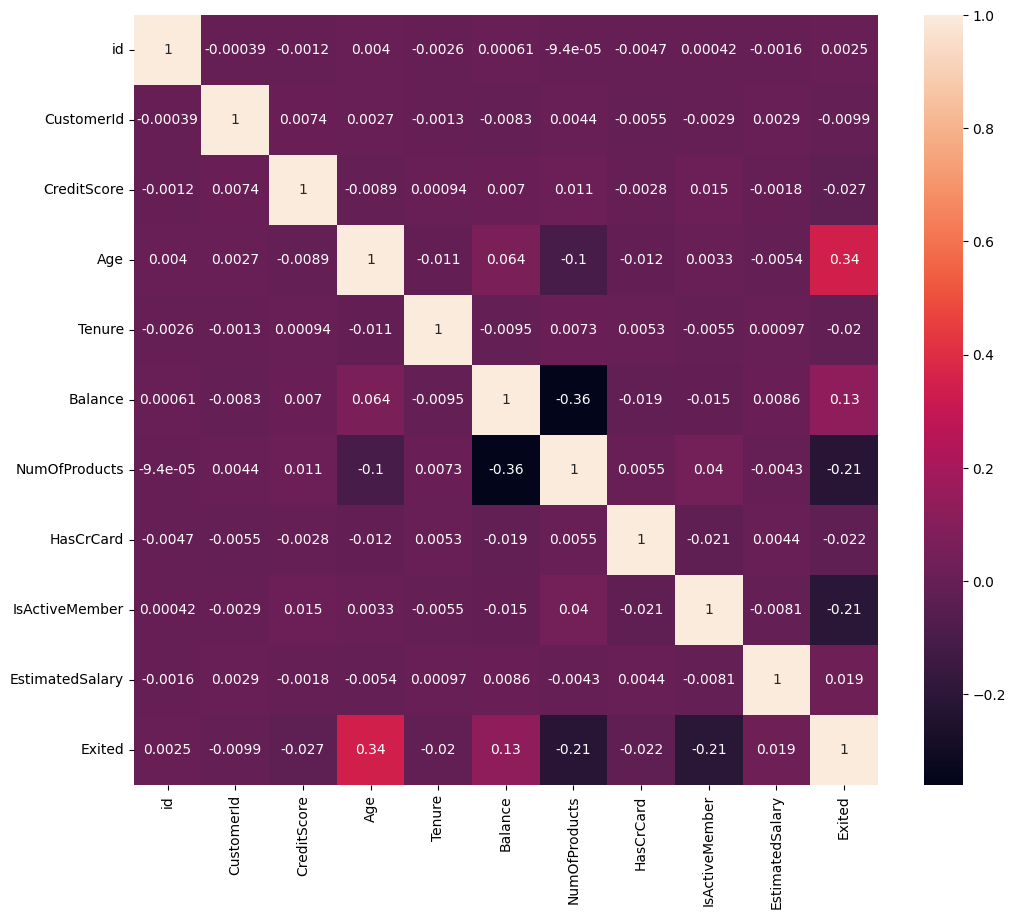

In [ ]:

# correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)
plt.show()


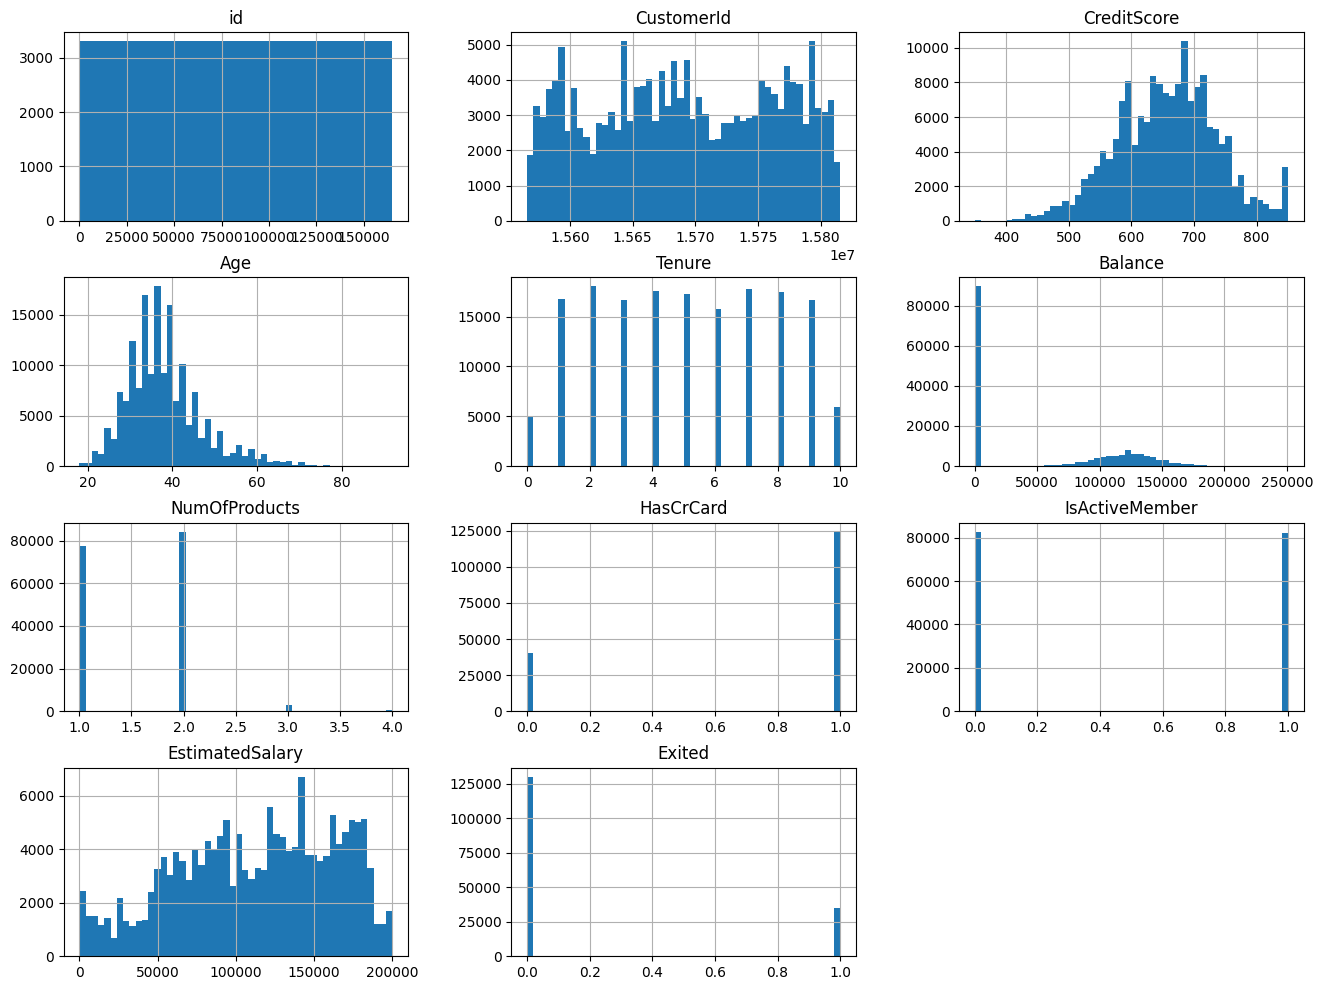

In [ ]:

train.hist(bins=50, figsize=(16,12))
plt.show()


## Data preprocessing

In [ ]:
df_test = test
df_combined = train

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l_test=list(df_test)
l_combined=list(df_combined)
le = LabelEncoder()
l1=df_combined['Surname'].unique()
l2=df_test['Surname'].unique()
l3=np.hstack([l1,l2])
l_Surname=list(np.unique(l3))

l_Surname=le.fit_transform(l_Surname)
df_combined['Surname']=le.transform(df_combined['Surname'])
df_combined=pd.DataFrame(df_combined,columns=l_combined)
df_test['Surname']=le.transform(df_test['Surname'])
df_test=pd.DataFrame(df_test,columns=l_test)

le = LabelEncoder()
df_combined['Gender']=le.fit_transform(df_combined['Gender'])
df_test['Gender']=le.transform(df_test['Gender'])
df_test=pd.DataFrame(df_test,columns=l_test)

le = LabelEncoder()
df_combined['Geography']=le.fit_transform(df_combined['Geography'])
df_test['Geography']=le.transform(df_test['Geography'])
df_test=pd.DataFrame(df_test,columns=l_test)


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  int64  
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int64  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 17.6 MB


In [ ]:
y_train=df_combined['Exited']
X_train=df_combined.drop(['Exited','id'],axis=1)
X_test=df_test.drop(['id'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
candiate_features_1=['Surname','CreditScore','Geography','Tenure','HasCrCard','EstimatedSalary']
candiate_features_2=['Surname','Tenure','HasCrCard','EstimatedSalary']
candiate_features_3=[]

In [ ]:
y_train=y_train.to_numpy()
y_Val = y_Val.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import optuna


In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("done")

done


In [ ]:
n_run=0
test_preds = [] #for storing test_preds calculated by each model
errors_list = [] #for storing errors calculated by each model
scores_list = [] #for storing roc auc scores calculated by each model
score_threshold=0.0
CV_Value=10
n_splits=10 #20 #15
SEED   = 97

In [ ]:
xgbs = []
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)


In [ ]:
from sklearn.metrics import roc_curve, auc

#roc curve area
def auc_score(model):
  predictions = model.predict(X_Val)
  predictions = np.round(predictions)
  fpr, tpr, thresholds = roc_curve(y_Val, predictions)
  roc_auc = auc(fpr, tpr)
  return roc_auc


In [ ]:
def make_xgbt(params, train_data, val_data):
    xgb_params_1 = {
        'n_estimators': params['n_estimators'],
        'objective':'binary:logistic',
        'max_depth':params['max_depth'],
        'eta':0.02,
        'random_state':45,
        'subsample': params['subsample'],
        'colsample_bytree':params['colsample_bytree']
    }
    n_round = 500
    watchlist = [(val_data, 'validation')]

    # Build your model with the hyperparameters
    bst = xgb.train(xgb_params_1, train_data, n_round, evals=watchlist, early_stopping_rounds=50, verbose_eval=500)
    return bst

In [ ]:
def objective(trial, train_data, val_data):
    # Define your hyperparameters to be tuned within the objective function
    n_estimators = trial.suggest_int('n_estimators', 200, 1200)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.9)
    subsample = trial.suggest_float('subsample', 0.5, 0.75)
    max_depth = trial.suggest_int('max_depth', 10, 17)

    # ... add more hyperparameters as needed
    params = {
        'n_estimators': n_estimators,
        'colsample_bytree': colsample_bytree,
        'max_depth': max_depth,
        'subsample': subsample
    }

    # Build your model with the hyperparameters
    bst = make_xgbt(params, train_data, val_data)
    val_fold_preds = bst.predict(val_data, iteration_range=(0, bst.best_iteration + 1))

    score = roc_auc_score(y_train[val_idx], val_fold_preds)

    return score  # Optuna will try to maximize this value

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
  print(f'Fold {fold + 1}*******************************************************')
  train_data = xgb.DMatrix(X_train.iloc[train_idx], label=y_train[train_idx])
  val_data = xgb.DMatrix(X_train.iloc[val_idx], label=y_train[val_idx])
  objective_lambda = lambda trial: objective(trial, train_data=train_data, val_data=val_data)

  study = optuna.create_study(direction='maximize')
  study.optimize(objective_lambda, n_trials=5)
  print('Best trial:')
  trial = study.best_trial
  print('AUC:', trial.value)
  print('Hyperparameters:', trial.params)
  best_params = study.best_params
  xgbs.append(make_xgbt(best_params, train_data, val_data))



In [ ]:
rfc=RandomForestClassifier(n_estimators=350,max_features='auto',max_depth=12,criterion='gini',random_state=42)
rfc.fit(X_train,y_train)
print(auc_score(rfc))


0.7366154170765286


In [ ]:
ERF=ExtraTreesClassifier(n_estimators=211,max_depth=18,criterion='gini',random_state=45)
ERF.fit(X_train,y_train)
print(auc_score(ERF))

0.7332402715228067


In [ ]:
def xgbs_prediction(test_data):
  predictions = []
  for bst in xgbs:
    test_DMatrix = xgb.DMatrix(test_data)
    test_fold_preds = bst.predict(test_DMatrix,iteration_range=(0, bst.best_iteration + 1))
    predictions.append(test_fold_preds)
  avg_xgb_test_preds = sum(predictions) / len(xgbs)
  return avg_xgb_test_preds
def rfc_prediction(test_data):
  y_hat_test_rf=rfc.predict_proba(test_data)[:,1]
  return y_hat_test_rf
def erf_prediction(test_data):
  y_hat_test_erf=ERF.predict_proba(test_data)[:,1]
  return y_hat_test_erf

In [ ]:
def objective_weight(trial):
    # Define your hyperparameters to be tuned within the objective function
    xgb_weight = trial.suggest_float('xgb_weight', 0.1, 0.9)
    rfc_weight = trial.suggest_float('rfc_weight', 0.1, 0.9)
    erf_weight = trial.suggest_float('erf_weight', 0.1, 0.9)

    xgbpred = xgbs_prediction(X_Val)
    rfcpred = rfc_prediction(X_Val)
    erfpred = erf_prediction(X_Val)
    y_hat = xgb_weight * xgbpred + rfc_weight * rfcpred + erf_weight * erfpred
    y_hat[y_hat>1]=1.0

    fpr, tpr, thresholds = roc_curve(y_Val, y_hat)
    roc_auc = auc(fpr, tpr)

    return roc_auc  # Optuna will try to maximize this value

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_weight, n_trials=20)
print('Best trial:')
trial = study.best_trial
print('AUC:', trial.value)
print('Hyperparameters:', trial.params)


[I 2024-01-05 18:19:21,727] A new study created in memory with name: no-name-b339ed2a-2f81-42b0-8d6a-92b5c156d958
[I 2024-01-05 18:19:35,829] Trial 0 finished with value: 0.8860899803277208 and parameters: {'xgb_weight': 0.12016746448254559, 'rfc_weight': 0.7737328779930106, 'erf_weight': 0.48862927014163304}. Best is trial 0 with value: 0.8860899803277208.
[I 2024-01-05 18:19:50,895] Trial 1 finished with value: 0.8876853553866187 and parameters: {'xgb_weight': 0.8449742135175854, 'rfc_weight': 0.27238639530499675, 'erf_weight': 0.3787599729869706}. Best is trial 1 with value: 0.8876853553866187.
[I 2024-01-05 18:20:05,986] Trial 2 finished with value: 0.8865473769764989 and parameters: {'xgb_weight': 0.6766307877771471, 'rfc_weight': 0.14636175564984308, 'erf_weight': 0.7367798734849716}. Best is trial 1 with value: 0.8876853553866187.
[I 2024-01-05 18:20:20,287] Trial 3 finished with value: 0.8868777424326034 and parameters: {'xgb_weight': 0.372404318893813, 'rfc_weight': 0.35325977

Best trial:
AUC: 0.8889625745762549
Hyperparameters: {'xgb_weight': 0.7708274004504693, 'rfc_weight': 0.1007901855011359, 'erf_weight': 0.2907203325050418}


In [ ]:
def final_predict(test_data):
  weights = {'xgb_weight': 0.7869945542375962, 'rfc_weight': 0.16303954614841504, 'erf_weight': 0.23147542231431117}
  xgbpred = xgbs_prediction(test_data)
  rfcpred = rfc_prediction(test_data)
  erfpred = erf_prediction(test_data)
  y_hat = weights['xgb_weight'] * xgbpred + weights['rfc_weight'] * rfcpred + weights['erf_weight'] * erfpred
  y_hat[y_hat>1]=1.0

  return y_hat

In [ ]:
predictions = final_predict(X_Val)
fpr, tpr, thresholds = roc_curve(y_Val, predictions)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8890472446922807


In [ ]:
# 0.8890472446922807 {'xgb_weight': 0.7869945542375962, 'rfc_weight': 0.16303954614841504, 'erf_weight': 0.23147542231431117}
# 0.8869538811751394

In [ ]:
def prepare_submission(test_data):
  y_hat = final_predict(test_data)
  my_submission = pd.DataFrame({'id': df_test.id, 'Exited': y_hat})
  print(my_submission)
  my_submission.to_csv('submission.csv', index=False)
prepare_submission(X_test)

            id    Exited
0       165034  0.026783
1       165035  0.992215
2       165036  0.034620
3       165037  0.279685
4       165038  0.351145
...        ...       ...
110018  275052  0.053861
110019  275053  0.151620
110020  275054  0.026306
110021  275055  0.226350
110022  275056  0.263679

[110023 rows x 2 columns]


In [ ]:
y_hat_test_rf=rfc.predict_proba(X_test)[:,1]
#y_hat_test_xg=xgb_clf.predict_proba(X_test)[:,1]
y_hat_test_erf=ERF.predict_proba(X_test)[:,1]